In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Get data

In [3]:
df = pd.read_csv('/content/lung cancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,2,1,1,2,1,2,1,1,2,2,2,1,1,YES
1,M,71,2,2,1,1,2,1,2,2,1,1,2,2,1,YES
2,M,61,2,1,1,2,2,1,2,2,1,1,2,2,2,NO
3,M,55,2,2,1,2,1,1,1,2,2,1,2,2,2,YES
4,F,56,2,1,1,1,1,2,2,2,2,1,2,2,2,YES


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 20000 non-null  object
 1   AGE                    20000 non-null  int64 
 2   SMOKING                20000 non-null  int64 
 3   YELLOW_FINGERS         20000 non-null  int64 
 4   ANXIETY                20000 non-null  int64 
 5   PEER_PRESSURE          20000 non-null  int64 
 6   CHRONIC DISEASE        20000 non-null  int64 
 7   FATIGUE                20000 non-null  int64 
 8   ALLERGY                20000 non-null  int64 
 9   WHEEZING               20000 non-null  int64 
 10  ALCOHOL CONSUMING      20000 non-null  int64 
 11  COUGHING               20000 non-null  int64 
 12  SHORTNESS OF BREATH    20000 non-null  int64 
 13  SWALLOWING DIFFICULTY  20000 non-null  int64 
 14  CHEST PAIN             20000 non-null  int64 
 15  LUNG_CANCER        

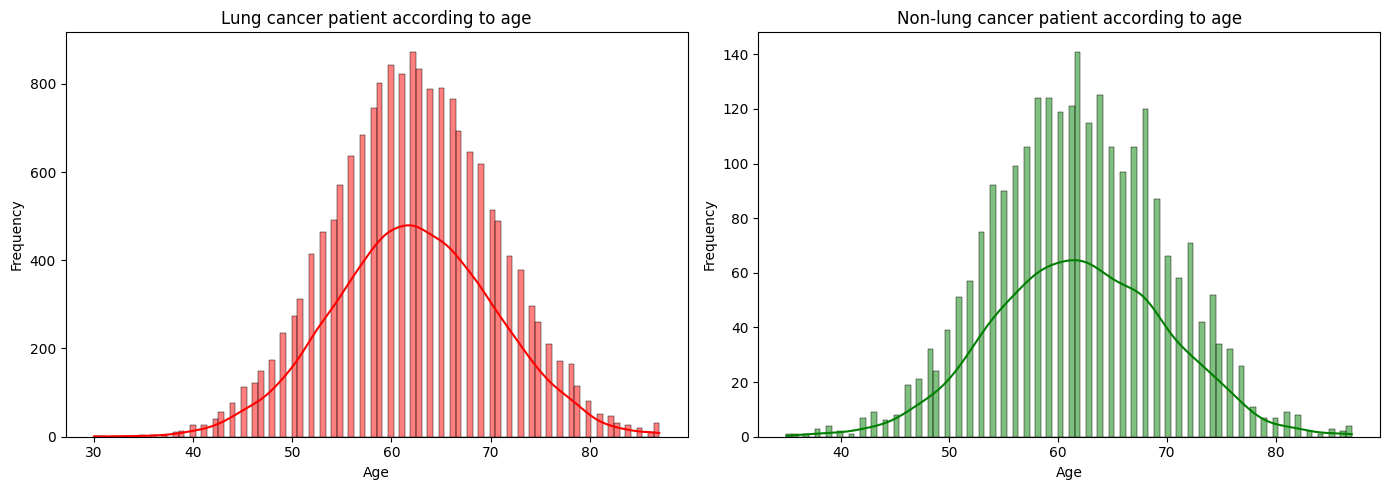

In [5]:
fig, axes = plt.subplots(1,2, figsize=(14,5))

# Making lung cancer patient plot
sns.histplot(df[df['LUNG_CANCER'] == 'YES'], x = 'AGE', bins = 100, kde = True,
             ax = axes[0], color = 'red')
axes[0].set_title('Lung cancer patient according to age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
# making non lung cancer patient plot
sns.histplot(df[df['LUNG_CANCER'] == 'NO'], x = 'AGE', bins = 100, kde = True,
             ax = axes[1], color = 'green')
axes[1].set_title('Non-lung cancer patient according to age')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

# Show plot
plt.tight_layout()
plt.show()

<Axes: xlabel='LUNG_CANCER', ylabel='count'>

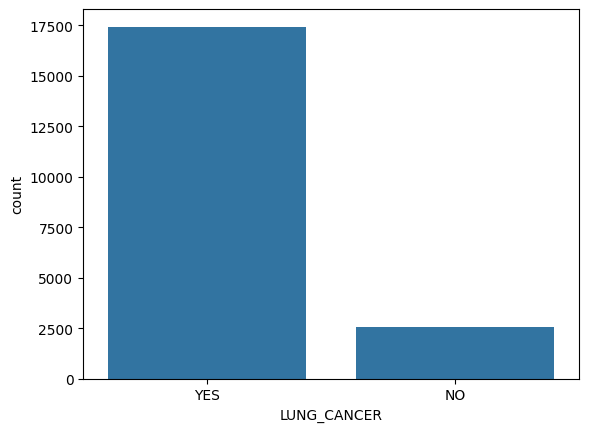

In [6]:
sns.countplot(x = df['LUNG_CANCER'])

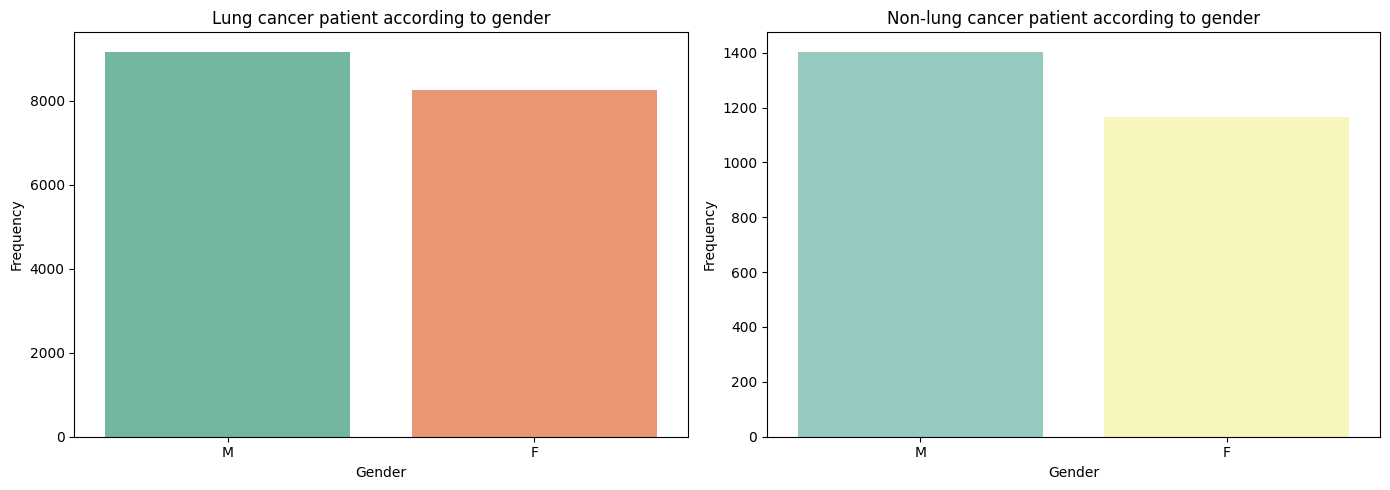

In [7]:
fig, axes = plt.subplots(1,2, figsize=(14,5))

sns.countplot(x = df[df['LUNG_CANCER'] == 'YES']['GENDER'], ax = axes[0], palette = 'Set2')
axes[0].set_title('Lung cancer patient according to gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Frequency')

sns.countplot(x = df[df['LUNG_CANCER'] == 'NO']['GENDER'], ax = axes[1], palette = 'Set3')
axes[1].set_title('Non-lung cancer patient according to gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Encoding categorical data

In [8]:
from sklearn.preprocessing import LabelEncoder
df_cleaned = df.copy() # copy dataframe

scaler = LabelEncoder()
for col in ['GENDER', 'LUNG_CANCER']:
  df_cleaned[col] = scaler.fit_transform(df_cleaned[col])

df_cleaned.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,2,1,1,2,1,2,1,1,2,2,2,1,1,1
1,1,71,2,2,1,1,2,1,2,2,1,1,2,2,1,1
2,1,61,2,1,1,2,2,1,2,2,1,1,2,2,2,0
3,1,55,2,2,1,2,1,1,1,2,2,1,2,2,2,1
4,0,56,2,1,1,1,1,2,2,2,2,1,2,2,2,1


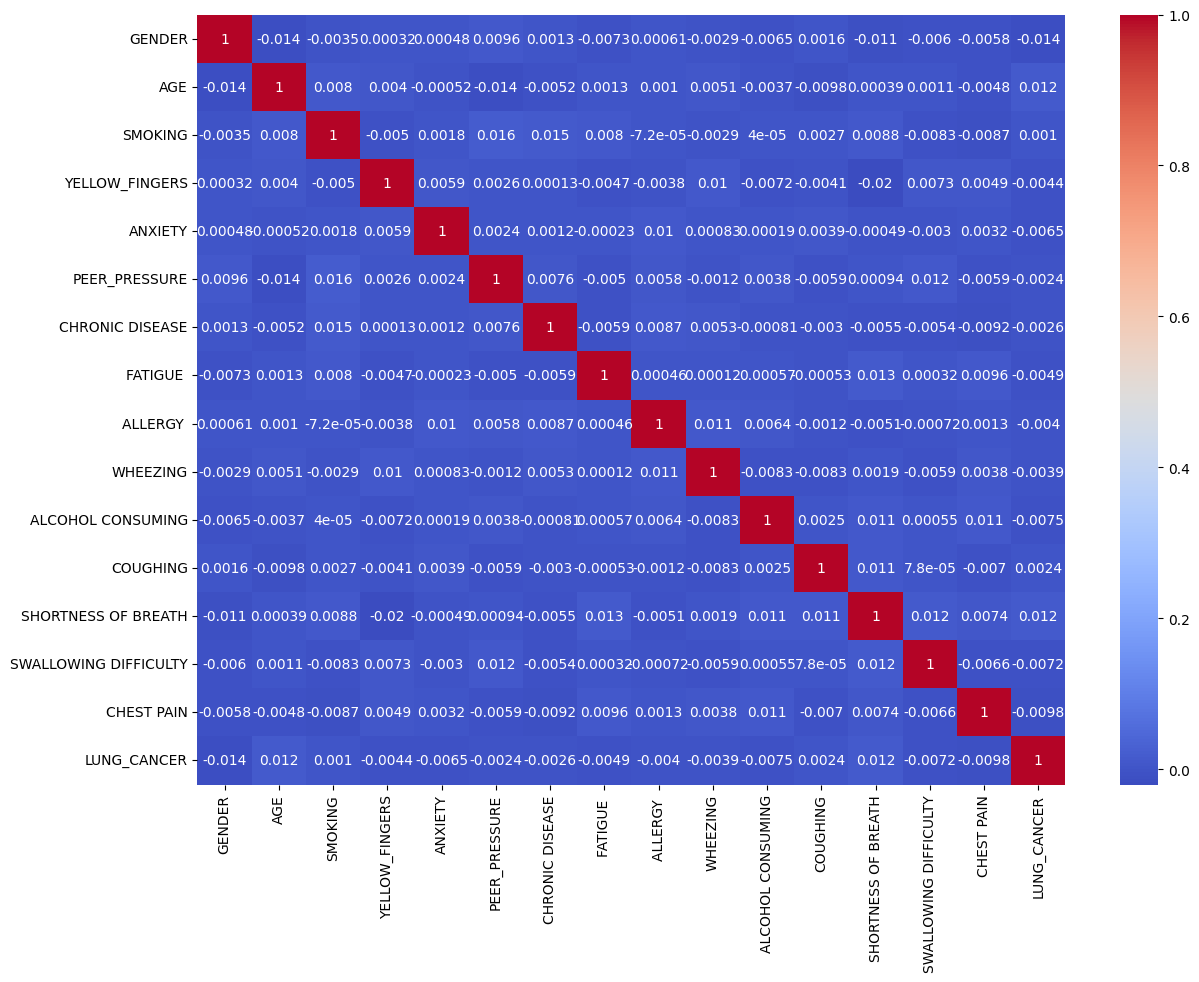

In [9]:
plt.figure(figsize = (14,10))
sns.heatmap(df_cleaned.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [10]:
X = df_cleaned.drop('LUNG_CANCER', axis = 1).values
y = df_cleaned['LUNG_CANCER'].values

In [11]:
X

array([[ 1, 69,  2, ...,  2,  1,  1],
       [ 1, 71,  2, ...,  2,  2,  1],
       [ 1, 61,  2, ...,  2,  2,  2],
       ...,
       [ 1, 58,  1, ...,  1,  2,  1],
       [ 0, 67,  2, ...,  1,  2,  2],
       [ 0, 57,  2, ...,  1,  1,  2]])

In [12]:
y

array([1, 1, 0, ..., 1, 1, 1])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Build model

In [14]:
# build SVM Classifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


svm_clf = make_pipeline(StandardScaler(),
                        SVC(gamma = 'auto', kernel= 'poly', class_weight= 'balanced', C = 5))
svm_clf.fit(X_train, y_train)

# predict
y_pred = svm_clf.predict(X_test)

# evaluate
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.13      0.43      0.20       523
           1       0.87      0.55      0.67      3477

    accuracy                           0.54      4000
   macro avg       0.50      0.49      0.44      4000
weighted avg       0.77      0.54      0.61      4000

[[ 227  296]
 [1557 1920]]
0.53675


In [15]:
# build XGBoost classifier model
from xgboost import XGBClassifier

xgb = make_pipeline(StandardScaler(),
                    XGBClassifier())
xgb.fit(X_train, y_train)

# predict
y_pred = xgb.predict(X_test)

# evaluate model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.18      0.01      0.02       523
           1       0.87      0.99      0.93      3477

    accuracy                           0.86      4000
   macro avg       0.52      0.50      0.47      4000
weighted avg       0.78      0.86      0.81      4000

[[   5  518]
 [  23 3454]]
0.86475


# Handiling imbalance data

In [16]:
# Use SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)




In [17]:
print("Original dataset shape:", X.shape, y.shape)
print("Resampled dataset shape:", X_smote.shape, y_smote.shape)
#check resample dataset shape

Original dataset shape: (20000, 15) (20000,)
Resampled dataset shape: (34864, 15) (34864,)


In [18]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Build model after uppersampling

In [19]:
# build XGboost model again
xgb_smote = make_pipeline(StandardScaler(),
                    XGBClassifier(
                        max_depth = 10, # after using grid search
                        learning_rate = 0.2,
                        n_estimators = 300
                    ))
xgb_smote.fit(X_train, y_train)

# predict
y_pred = xgb_smote.predict(X_test)

# evaluate
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      3485
           1       0.90      0.84      0.87      3488

    accuracy                           0.88      6973
   macro avg       0.88      0.88      0.87      6973
weighted avg       0.88      0.88      0.87      6973

[[3177  308]
 [ 563 2925]]
0.8750896314355371


In [20]:
# build decision tree model
from sklearn.tree import DecisionTreeClassifier

decision_tree = make_pipeline(StandardScaler(),
                              DecisionTreeClassifier(
                                  max_depth = 10,
                                  random_state = 42,
                                  min_samples_leaf= 2,
                                  min_samples_split= 10,
                                  max_features= 'sqrt',
                                  criterion= 'entropy',
                                  class_weight= 'balanced'

                              ))
decision_tree.fit(X_train, y_train) # use smote data

# predict
y_pred = decision_tree.predict(X_test)

# evaluate
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
#

              precision    recall  f1-score   support

           0       0.62      0.69      0.65      3485
           1       0.65      0.58      0.61      3488

    accuracy                           0.63      6973
   macro avg       0.64      0.63      0.63      6973
weighted avg       0.64      0.63      0.63      6973

[[2403 1082]
 [1469 2019]]
0.6341603327118888


In [23]:
# build random forest model
from sklearn.ensemble import RandomForestClassifier
random_forest = make_pipeline(StandardScaler(),
                              RandomForestClassifier(
                                  n_estimators = 200,
                                  max_depth = 30,
                                  min_samples_split = 10,
                                  min_samples_leaf = 1)
)

random_forest.fit(X_train, y_train)

#predict
y_pred = random_forest.predict(X_test)

# evaluate
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      3485
           1       0.82      0.81      0.81      3488

    accuracy                           0.81      6973
   macro avg       0.81      0.81      0.81      6973
weighted avg       0.81      0.81      0.81      6973

[[2861  624]
 [ 675 2813]]
0.8137100243797505
